<a href="https://colab.research.google.com/github/OsvaldoFloresC/OsvaldoFloresC/blob/main/InterNewton_Sympy.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

El polinomio de interpolación de Newton se puede expresar de la siguiente manera: \begin{equation}
 P_n(x) = F_{0,0} + \sum_{i=1}^{n} F_{i,i} \prod_{j=0}^{i-1} (x - x_j)
 \end{equation}

 donde $(F_{i,i})$ es la i-ésima diferencia dividida, calculada como:
 \begin{equation} F_{i,i} = f[x_0, x_1, \ldots, x_i] \end{equation}

Utilizando la tabla con el ejemplo de interpolacion de newton, comenzando por los valores dados y luego calculando sucesivamente las diferencias divididas entre los puntos.
\begin{array}{|c|c|c|c|c|c||}
x & y=F(x) & \Delta y & \Delta^{2} y & \Delta^{3} y \\
\hline
0 & -5 & 6 & 2 & 6  \\
1 & 1 & 8 & 8 & 6  \\
2 & 9 & 16 & 14 & 6   \\
3 & 25 & 30 & 20 &  \\
4 & 55 & 50 &   &  \\
5 & 105 &   &   &  \\
\end{array}



Polinomio de interpolación de Newton:
     3        2              
1.0⋅X  - 2.0⋅X  + 7.0⋅X - 5.0


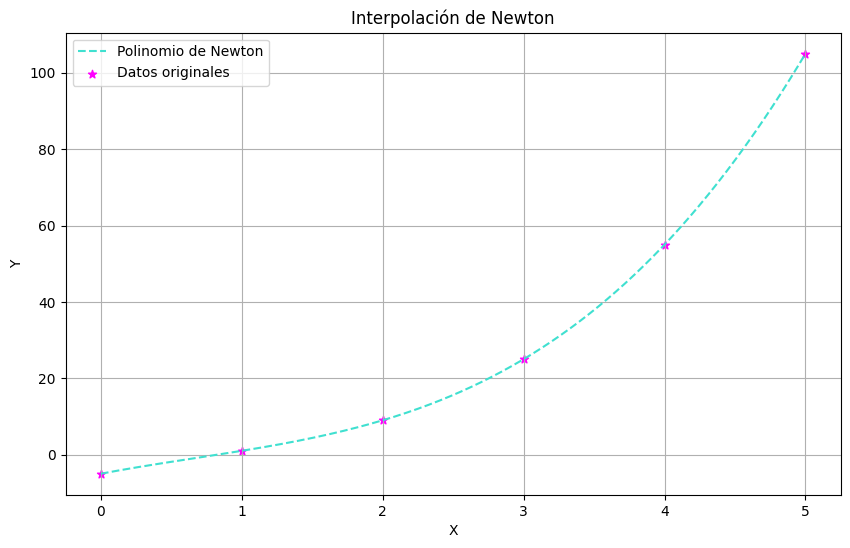

In [ ]:
import numpy as np
import sympy as sp
import matplotlib.pyplot as plt

# Datos de la tabla
x = np.array([0, 1, 2, 3, 4, 5])  # Valores de x
y = np.array([-5, 1, 9, 25, 55, 105])  # Valores de y=f(x)

# Definir la variable simbólica
X = sp.symbols('X')

def diferencias_divididas(x, y):

    n = len(x)
    # Crear una tabla vacía para las diferencias divididas
    tabla = [[0 for _ in range(n)] for __ in range(n)]

    # Copiar los valores de y en la primera columna de la tabla
    for i in range(n):
        tabla[i][0] = y[i]

    # Calcular las diferencias divididas
    for j in range(1, n):
        for i in range(n - j):
            tabla[i][j] = (tabla[i + 1][j - 1] - tabla[i][j - 1]) / (x[i + j] - x[i])

    return tabla

def interpolacion_newton(x, y):

    # Calcular la tabla de diferencias divididas
    tabla_diferencias = diferencias_divididas(x, y)

    # Construir el polinomio de Newton
    n = len(x)
    polinomio = tabla_diferencias[0][0]
    for i in range(1, n):
        termino = tabla_diferencias[0][i]
        for j in range(i):
            termino *= (X - x[j])
        polinomio += termino

    # Simplificar el polinomio
    polinomio = sp.simplify(polinomio)
    return polinomio

# Calcular el polinomio de interpolación de Newton
polinomio = interpolacion_newton(x, y)
print("Polinomio de interpolación de Newton:")
sp.pretty_print(polinomio)

# Convertir el polinomio simbólico a una función numérica
polinomio_func = sp.lambdify(X, polinomio)

# Generar puntos para la gráfica del polinomio
x_polinomio = np.linspace(min(x), max(x), 1000)
y_polinomio = polinomio_func(x_polinomio)

# Crear la gráfica
plt.figure(figsize=(10, 6))
plt.plot(x_polinomio, y_polinomio, label='Polinomio de Newton', color='Turquoise', linestyle='--')
plt.scatter(x, y, color='Magenta', marker='*', label='Datos originales')
plt.title('Interpolación de Newton')
plt.xlabel('X')
plt.ylabel('Y')
plt.legend()
plt.grid(True)
plt.show()



utilizando algebra computacional(sympy) tenemos que el polonimio resultante de la tabla es:

In [ ]:
sp.simplify(polinomio)


1.0*X**3 - 2.0*X**2 + 7.0*X - 5.0

al evaluar el poliniomio en 3 nos da como resultado 25

In [ ]:
x=3
print(polinomio_func(x))

25.0


con lo cual corroboramos que el polinomio interpolante de Newton pasa por los puntos dados en la tabla de diferencias divididas.

La interpolación de Newton es una técnica poderosa y versátil que facilita el análisis y la manipulación de datos en diversas disciplinas. Su eficiencia, precisión y adaptabilidad la hacen una herramienta esencial en la caja de herramientas de cualquier científico, ingeniero o matemático.